In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<Axes: xlabel='median_house_value', ylabel='Count'>

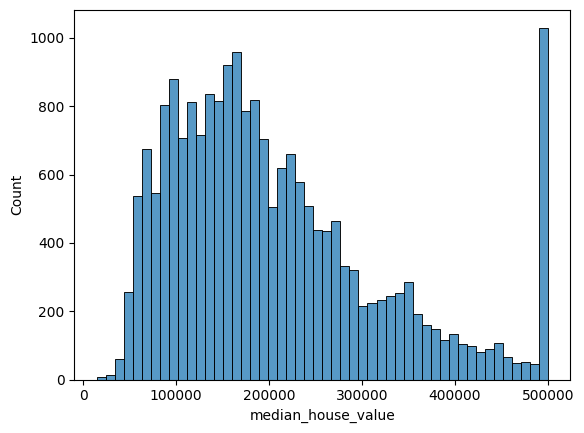

In [4]:
sns.histplot(df.median_house_value, bins=50)

In [5]:
df1 = df[ 
   (df['ocean_proximity'] == '<1H OCEAN') |
   (df['ocean_proximity'] == 'INLAND')
]
df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
df1.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df1['population'].describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

In [8]:
n = len(df1)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [9]:
n

15687

In [10]:
n_val, n_test, n_train

(3137, 3137, 9413)

In [11]:
df_train = df1.iloc[:n_train]
df_val = df1.iloc[n_train:n_train+n_val]
df_test = df1.iloc[n_train+n_val:]

In [12]:
idx = np.arange(n)

In [409]:
np.random.seed(9)
np.random.shuffle(idx)

In [410]:
df_train = df1.iloc[idx[:n_train]]
df_val = df1.iloc[idx[n_train:n_train+n_val]]
df_test = df1.iloc[idx[n_train+n_val:]]

In [411]:
mhv_logs = np.log1p(df['median_house_value'])

<Axes: xlabel='median_house_value', ylabel='Count'>

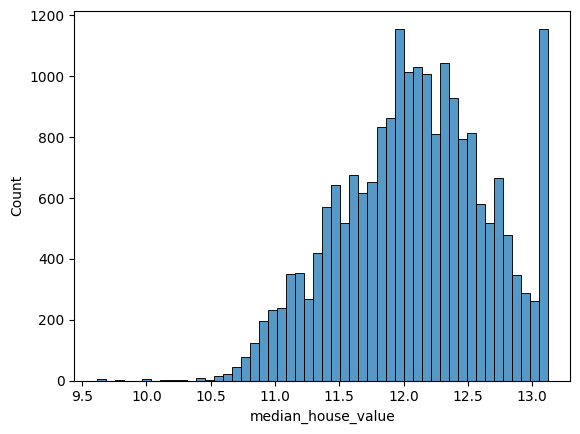

In [412]:
sns.histplot(mhv_logs, bins=50)

In [413]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5068,-118.30,33.98,44.0,1597.0,388.0,902.0,321.0,1.9556,93300.0,<1H OCEAN
18117,-122.02,37.32,27.0,4336.0,754.0,2009.0,734.0,6.3923,348300.0,<1H OCEAN
5740,-118.25,34.16,52.0,2477.0,385.0,993.0,371.0,4.9135,368100.0,<1H OCEAN
19304,-122.76,38.35,30.0,2260.0,374.0,958.0,359.0,5.0323,222400.0,<1H OCEAN
10561,-117.71,33.62,22.0,2520.0,387.0,1338.0,391.0,5.8898,242800.0,<1H OCEAN


In [414]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [415]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [416]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [417]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [418]:
len(y_train)

9413

In [419]:
df_train.iloc[10]

longitude                -118.3
latitude                  33.79
housing_median_age          9.0
total_rooms              2782.0
total_bedrooms            884.0
population               1790.0
households                748.0
median_income            2.9154
ocean_proximity       <1H OCEAN
Name: 10, dtype: object

In [420]:
xi = [633, 247, 3.925]
w0 = 4.32
w = [0.2, 0.05, 0.008]

In [421]:
def dot(xi, w):
    n = len(xi)
    res = 0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res

In [422]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [423]:
w_new = [w0] + w
w_new

[4.32, 0.2, 0.05, 0.008]

In [424]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [425]:
linear_regression(xi)

143.3014

Question 3 : RMSE

In [426]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [427]:
w0, w

(4.32, [0.2, 0.05, 0.008])

In [428]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [429]:
base = [ 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

In [430]:
X_train = df_train[base].values

In [431]:
y_train

array([11.4435861 , 12.76082233, 12.81611264, ..., 12.26670197,
       11.9772945 , 10.81579034])

In [432]:
X_train = df_train[base].fillna(0).values
np.shape(X_train)

(9413, 8)

In [433]:
w0, w = train_linear_regression(X_train, y_train)

In [434]:
y_pred = w0 + X_train.dot(w)
y_pred


array([11.89194845, 12.71910306, 12.3421998 , ..., 11.96519131,
       12.24318885, 11.53687219])

<Axes: ylabel='Count'>

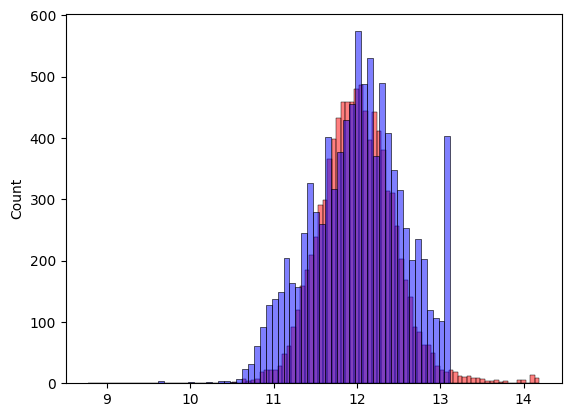

In [435]:
sns.histplot(y_pred, alpha=0.5, color='Red')
sns.histplot(y_train , alpha=0.5, color='Blue')

In [436]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [437]:
rmse_all = [rmse(y_train, y_pred)]
rmse_all

[0.341070824861769]

In [444]:
rmse_std = [0.34280727060911, 0.338605757717, 0.33670617028341, 0.3367829174999, 0.3356750717320, 0.3371975892901, 0.33837129312228, 0.3400331063573, 0.33957613036607, 0.341708248617]
np.std(rmse_std).round(3)

0.002

In [438]:
X_train.mean()

643.4586820075959

In [439]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(642.63)
    X = df_num.values
    return X

In [440]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred).round(2)

0.34

Question 4 : Regularisation

In [441]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [442]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    score = score.round(2)
    
    print(r, w0, score)

0 -10.647594521291023 0.34
1e-06 -10.647572358744554 0.34
0.0001 -10.645378741360563 0.34
0.001 -10.625478135794694 0.34
0.01 -10.430488156594805 0.34
0.1 -8.813090523498833 0.34
1 -3.4540431117454644 0.34
5 -0.9309546137772999 0.34
10 -0.48541572214107087 0.34


Question 6 :

In [445]:
df_full_train = pd.concat([df_train, df_val])

In [446]:
df_full_train = df_full_train.reset_index(drop=True)

In [447]:
X_full_train = prepare_X(df_full_train)

In [448]:
X_full_train

array([[-1.1830e+02,  3.3980e+01,  4.4000e+01, ...,  9.0200e+02,
         3.2100e+02,  1.9556e+00],
       [-1.2202e+02,  3.7320e+01,  2.7000e+01, ...,  2.0090e+03,
         7.3400e+02,  6.3923e+00],
       [-1.1825e+02,  3.4160e+01,  5.2000e+01, ...,  9.9300e+02,
         3.7100e+02,  4.9135e+00],
       ...,
       [-1.1812e+02,  3.3890e+01,  2.9000e+01, ...,  2.0300e+03,
         7.8100e+02,  2.5432e+00],
       [-1.1809e+02,  3.3890e+01,  4.2000e+01, ...,  7.1700e+02,
         2.1900e+02,  4.0926e+00],
       [-1.1981e+02,  3.6790e+01,  3.5000e+01, ...,  9.5400e+02,
         4.5700e+02,  2.9506e+00]])

In [449]:
y_full_train = np.concatenate([y_train, y_val])

In [450]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [451]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.33263719342835235